In [7]:
import numpy as np
import pandas as pd
import re
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, recall_score, classification_report,confusion_matrix
import glob
import os
import matplotlib.pyplot as plt

In [2]:
train_path = max(glob.glob('./data/train/*.csv'), key=os.path.getctime) 
test_path = max(glob.glob('./data/test/*.csv'), key=os.path.getctime) 
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print(train_df.shape)
print(test_df.shape)

(24756, 579)
(4369, 579)


In [3]:
print(train_df.columns[:25])
print(test_df.columns[:25])
# test_df.columns == train_df.columns

Index(['reward_tiers', 'min_reward', 'max_reward', 'goal', 'state',
       'staff_pick', 'has_video', 'rewards_0', 'rewards_1', 'rewards_2',
       'rewards_3', 'rewards_4', 'rewards_5', 'rewards_6', 'rewards_7',
       'rewards_8', 'rewards_9', 'rewards_10', 'rewards_11', 'rewards_12',
       'rewards_13', 'rewards_14', 'rewards_15', 'rewards_16', 'rewards_17'],
      dtype='object')
Index(['reward_tiers', 'min_reward', 'max_reward', 'goal', 'state',
       'staff_pick', 'has_video', 'rewards_0', 'rewards_1', 'rewards_2',
       'rewards_3', 'rewards_4', 'rewards_5', 'rewards_6', 'rewards_7',
       'rewards_8', 'rewards_9', 'rewards_10', 'rewards_11', 'rewards_12',
       'rewards_13', 'rewards_14', 'rewards_15', 'rewards_16', 'rewards_17'],
      dtype='object')


In [4]:
# features_to_drop = ['rewards', 'deadline', 'launched_at', 'rewards_processed', 'created_at',
# 'description_processed', 'description_story_processed','description_risks_processed',
# 'id', 'name', 'description', 'description_story', 'description_risks', 'video', 'state',
# 'location', 'category']

#features that are dependent on time and the final outcome

X_train, y_train = train_df.drop('state', axis=1), train_df['state']
X_test, y_test = test_df.drop('state', axis=1), test_df['state']

In [5]:
# Combine train and test data set tgt

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [6]:
# Check if dataset is balanced
print(train_df[train_df.state == 1].shape)
print(train_df[train_df.state == 0].shape)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17482, 579)
(7274, 579)
(24756, 578)
(24756,)
(4369, 578)
(4369,)


In [14]:
X_train.head()

,reward_tiers,min_reward,max_reward,goal,staff_pick,has_video,rewards_0,rewards_1,rewards_2,rewards_3,...,x0_UY,x0_VE,x0_VN,x0_VU,x0_WS,x0_XK,x0_YE,x0_ZA,x0_ZW,x0_nan
0,0.041667,0.000167,0.004995,0.000090,1,1,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.058333,0.000067,0.004495,0.000050,1,1,0.069896,0.069940,0.101049,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.058333,0.000033,0.000525,0.000006,0,1,0.077258,0.077307,0.000000,0.106794,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.041667,0.000133,0.010990,0.000340,0,1,0.014734,0.014744,0.021302,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.066667,0.000007,0.004995,0.000200,1,1,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#Default model
model_xgboost_default = XGBClassifier()

model_xgboost_default.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=[(X_test, y_test)],
                  verbose=True)

xgb_train_default_predict = model_xgboost_default.predict(X_train)
xgb_test_default_predict = model_xgboost_default.predict(X_test)

c:\Users\bandy\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.51507
[1]	validation_0-logloss:0.41499
[2]	validation_0-logloss:0.34948
[3]	validation_0-logloss:0.30554
[4]	validation_0-logloss:0.27589
[5]	validation_0-logloss:0.25396
[6]	validation_0-logloss:0.23612
[7]	validation_0-logloss:0.22233
[8]	validation_0-logloss:0.21266
[9]	validation_0-logloss:0.20380
[10]	validation_0-logloss:0.19950
[11]	validation_0-logloss:0.19253
[12]	validation_0-logloss:0.18869
[13]	validation_0-logloss:0.18627
[14]	validation_0-logloss:0.18364
[15]	validation_0-logloss:0.18110
[16]	validation_0-logloss:0.17900
[17]	validation_0-logloss:0.17695
[18]	validation_0-logloss:0.17434
[19]	validation_0-logloss:0.17321
[20]	validation_0-logloss:0.17162
[21]	validation_0-logloss:0.16968
[22]	validation_0-logloss:0.16924
[23]	validation_0-logloss:0.16857
[24]	validation_0-logloss:0.16798
[25]	validation_0-logloss:0.16777
[26]	validation_0-logloss:0.16739
[27]	validation_0-logloss:0.16641
[28]	validation_0-logloss:0.16585
[29]	validation_0-loglos

**Evaluate Model Performance**

In [14]:
print(confusion_matrix(y_train, xgb_train_default_predict))
print(classification_report(y_train, xgb_train_default_predict))

[[ 6848   426]
 [  126 17356]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      7274
           1       0.98      0.99      0.98     17482

    accuracy                           0.98     24756
   macro avg       0.98      0.97      0.97     24756
weighted avg       0.98      0.98      0.98     24756



In [15]:
print(confusion_matrix(y_test, xgb_test_default_predict))
print(classification_report(y_test, xgb_test_default_predict))

[[1085  197]
 [  80 3007]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1282
           1       0.94      0.97      0.96      3087

    accuracy                           0.94      4369
   macro avg       0.93      0.91      0.92      4369
weighted avg       0.94      0.94      0.94      4369



In [16]:
model_xgboost_default.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'auc',
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [13]:
# y_train_pred = model_xgboost_complex.predict_proba(X_train)[:,1]
# y_test_pred = model_xgboost_complex.predict_proba(X_test)[:,1] # Slicing to obtain prob of observation being 1

# print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
#                                                     roc_auc_score(y_test, y_test_pred)))

AUC Train: 0.9891
AUC Valid: 0.9750


**Hyperparameter Tuning**

We will use GridSearchCV for hyperparameter tuning.


In [9]:
learning_rate_list = [0.02, 0.05, 0.1]
max_depth_list = [2, 3, 5]
n_estimators_list = [50, 100, 150]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print(num_combinations)
params_dict

27


{'learning_rate': [0.02, 0.05, 0.1],
 'max_depth': [2, 3, 5],
 'n_estimators': [50, 100, 150]}

In [10]:
# Custom cross-validation method
cv_method = RepeatedStratifiedKFold(n_splits=3, 
                                    n_repeats=2, 
                                    random_state=2022)

model_xgboost_tuning = RandomizedSearchCV(estimator= XGBClassifier(),
                                param_distributions = params_dict,
                                cv=cv_method,
                                scoring='roc_auc',
                                return_train_score=True,
                                verbose=2,
                                random_state=2022)

model_xgboost_tuning.fit(X, y)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


KeyboardInterrupt: 

In [23]:
df_cv_results = pd.DataFrame(model_xgboost_tuning.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
3,1,0.978351,0.996028,0.1,5,150
4,2,0.969464,0.972784,0.1,2,100
9,3,0.965955,0.970468,0.1,3,50
1,4,0.963603,0.972855,0.05,5,50
0,5,0.960503,0.969132,0.02,5,100
7,6,0.958736,0.961239,0.05,2,100
6,7,0.956816,0.960620,0.02,3,150
5,8,0.953039,0.956575,0.05,3,50
8,9,0.950087,0.952266,0.02,2,150
2,10,0.948468,0.951616,0.02,3,100


## Final Model
Using best parameters from above step

In [8]:
import time
start_time = time.time()
model_xgboost_fin = XGBClassifier(n_estimators= 150, max_depth = 5, learning_rate = 0.1)

# model_xgboost_fin = xgb.XGBClassifier(**model_xgboost_tuning.best_params_)
model_xgboost_fin.fit(X_train, y_train)
y_pred_test = model_xgboost_fin.predict(X_test)

time_taken = time.time() - start_time
print("Total time taken for the program execution", time_taken) # seconds
print(classification_report(y_test, y_pred_test, digits=5))
print(roc_auc_score(y_test, y_pred_test))

Total time taken for the program execution 64.2533106803894
              precision    recall  f1-score   support

           0    0.93745   0.85335   0.89343      1282
           1    0.94129   0.97635   0.95850      3087

    accuracy                        0.94026      4369
   macro avg    0.93937   0.91485   0.92596      4369
weighted avg    0.94016   0.94026   0.93940      4369

0.9148532899527838


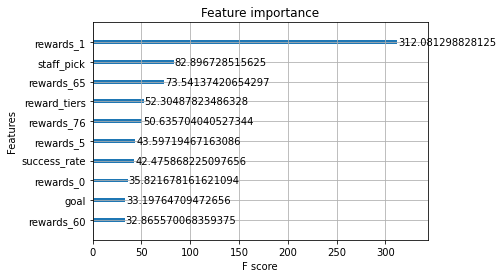

In [24]:
plot_importance(model_xgboost_fin, importance_type = 'gain', max_num_features=10)
plt.show()

In [18]:
var_colums = [c for c in X_train.columns if c not in ['state']]

df_var_imp = pd.DataFrame({"Feature": var_colums,
                           "Importance": model_xgboost_fin.feature_importances_})\
                        .sort_values(by='Importance', ascending=False)
df_var_imp[:10]

,Feature,Importance
7,rewards_1,0.109209
4,staff_pick,0.029009
71,rewards_65,0.025735
0,reward_tiers,0.018304
82,rewards_76,0.017719
11,rewards_5,0.015256
421,success_rate,0.014864
6,rewards_0,0.012535
3,goal,0.011617
66,rewards_60,0.011501


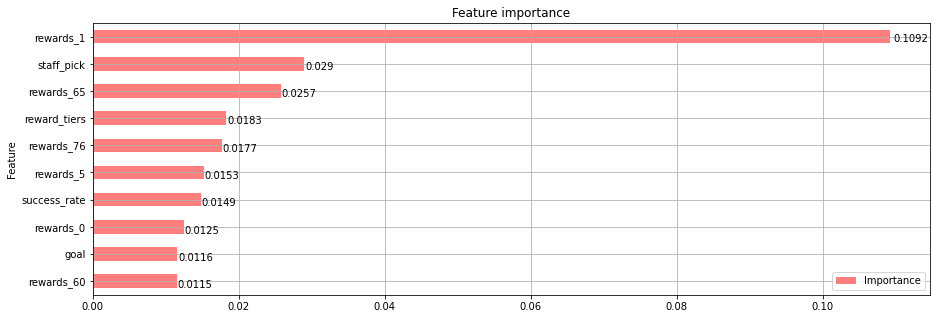

In [56]:
top_10_features = df_var_imp[:10].sort_values('Importance').set_index('Feature')
ax = top_10_features.plot.barh(color='red', alpha=0.5, grid=True, title='Feature importance', figsize=(15, 5))

# df_var_imp[:10].plot(kind='barh',y='Importance',x='Feature',color='r')
for p, value in zip(ax.patches, top_10_features['Importance']):
    ax.annotate(round(value, 4), (p.get_width() * 1.005, p.get_y() * 1.005))